This notebook is designed as one's first machine learning experiment. We will load and visualize a dataset of human heights and weights, and use a simple model to predict weight from height.

**After you've read, run, and understood the code, try to modify it as follows:**
* Easy: predict height from weight
* Easy: Add data normalization using a sklearn StandardScaler, as you learned in [the previous tutorial](DataAndTensors.ipynb). This should make optimization much faster because the initial neural network parameters are closer to optimal. **It's a good rule of thumb that a neural network's inputs should have approximately zero mean and unit standard deviation.**
* Harder: Test how using a too complex network for simple data can lead to overfitting and nonsensical predictions. Use data normalization as above and only the 50 first datapoints of the dataset. Use a network with two 32-neuron ReLU layers. You can add the first layer as ```model.add(keras.layers.Dense(32,activation="relu",input_shape=(1,)))``` and the next layers similarly, but without specifying the input_shape, which Keras can figure out by itself.

Model solutions are provided in the same folder, but first try to solve the problem yourself, at least for a few minutes. *Think of this as a puzzle game with optional hints that you will check only if you have to.*

Let's start by including the basic utilities. Now, we also need tensorflow in addition to numpy and pyplot. We also import Keras because it makes building and training basic neural networks easy.

For a bit more complex but similar example, see https://www.tensorflow.org/tutorials/keras/basic_classification

In [1]:
#The following "magic" tells Colab which Tensorflow version to use.
#Comment it out if running this notebook outside Colab
#%tensorflow_version 1.x   
import numpy as np
import matplotlib.pyplot as pp
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" #disable Tensorflow GPU usage, a simple example like this runs faster on CPU
import tensorflow as tf
from tensorflow import keras  
from sklearn.preprocessing import StandardScaler
import pandas as pd

c:\condaenvs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\condaenvs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\condaenvs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\condaenvs\tensorflow2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

Next we load the data and convert to metric system, similar to the previous tutorial.

Text(0, 0.5, 'Weight (kilograms)')

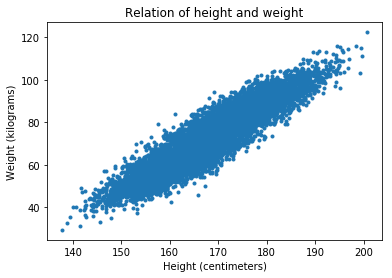

In [2]:
import pandas as pd
dataframe=pd.read_csv("https://raw.githubusercontent.com/PerttuHamalainen/MediaAI/master/Code/Datasets/weight-height.csv")
data=np.array(dataframe)
data=data[:,1:]
data=data.astype(np.float) 
data[:,0]*=2.54   
data[:,1]*=0.45359237
pp.scatter(data[:,0],data[:,1],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")

To predict weight from height, we're going to need a machine learning model. We will first train a single-neuron network, i.e., a simple linear model. 

In [3]:
#keras.Sequential makes it easy to compose a neural network models out of layers
model = keras.Sequential()

#Add a 1-neuron layer with linear activation, taking one input value. 
#The input_shape=(1,) defines that there's only a single input value, but batch size is yet unknown.
#Note that this notation is a bit misleading, as the batch data index dimension is really the first one and not the second one.  
#Fortunately, the input_shape needs to only be specified for the first layer
model.add(keras.layers.Dense(1,input_shape=(1,)))

#Make the model ready for optimization using Adam optimizer (the usual reasonable first guess).
#The loss parameter defines the loss function that optimization tries to minimize, in this case
#the mean squared error between the network outputs and actual data values.
#The lr parameter is the "learning rate". With this simple model, we can use a high learning rate of 0.1,
#whereas many complex networks require 0.001 or even 0.0001. This makes training more stable but also more slow.
model.compile(optimizer=keras.optimizers.Adam(lr=0.1),loss="mean_squared_error")

#Define our training inputs and outputs. Our network takes in height (column 0 in the data) and outputs weight (column 1).
trainingInputs=data[:,0]
trainingOutputs=data[:,1]

#Reshape the tensors: This is needed because Tensorflow and Keras models expect to get data in batches, 
#as specified above.
#Reshaping does not change tensor contents, it just changes how the contents are indexed.
#Tensor of shapes [10], [10,1], and [1,10] can all have the same contents, but if one considers
#the Tensorflow convention of first dimension being the batch index, shape [10,1] denotes a batch of 10
#1D tensors, each containing a single number. Shape [1,10], in contrast, denotes a batch of a single
#1D tensor containing 10 numbers.
#Note that sometimes, Tensorflow can automatically convert shapes, but more often not, which is why we practice reshaping here. 
#You can try prining out the tensors before and after the reshaping!
trainingInputs=np.reshape(trainingInputs,[trainingInputs.shape[0],1])
trainingOutputs=np.reshape(trainingOutputs,[trainingOutputs.shape[0],1])

#Fit (train) the model. Epochs defines how many times the network will see all data during the training.
model.fit(trainingInputs,trainingOutputs,verbose=1,epochs=5)


Epoch 1/5
10000/10000 [==============================] - 2s 161us/step - loss: 244.4043
Epoch 2/5
10000/10000 [==============================] - 0s 23us/step - loss: 115.7225
Epoch 3/5
10000/10000 [==============================] - 0s 23us/step - loss: 115.1673
Epoch 4/5
10000/10000 [==============================] - 0s 38us/step - loss: 111.3210
Epoch 5/5
10000/10000 [==============================] - 0s 26us/step - loss: 112.5361


Now, let's plot the data again, adding the model predictions.

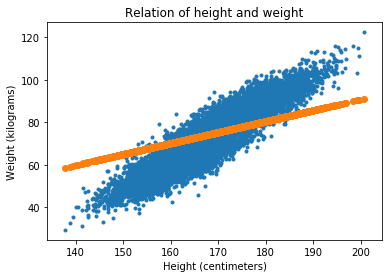

In [4]:
pp.figure(1)
#pp.scatter(data[:,0],data[:,1],marker=".")
pp.scatter(trainingInputs[:,0],trainingOutputs[:,0],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")
predictions=model.predict(trainingInputs)
#NOTE: The predictions is of the same shape as trainingOutputs, i.e., [10000,1]
#scatter() expects 1-dimensional x and y arrays; thus, we need to use the [:,0] and [:,1] indexing.
pp.scatter(trainingInputs[:,0],predictions[:,0])

What you should see above is a line that predicts growing weight with growing height, but it does not yet fit the data really well. However, the fit gets better when the training continues. Below, we optimize for 50 more epochs and then visualize again. 

Epoch 1/50
 - 0s - loss: 107.9373
Epoch 2/50
 - 0s - loss: 106.2294
Epoch 3/50
 - 0s - loss: 99.1863
Epoch 4/50
 - 0s - loss: 97.6635
Epoch 5/50
 - 0s - loss: 91.4698
Epoch 6/50
 - 0s - loss: 91.1231
Epoch 7/50
 - 0s - loss: 86.3920
Epoch 8/50
 - 0s - loss: 84.5739
Epoch 9/50
 - 0s - loss: 79.0184
Epoch 10/50
 - 0s - loss: 77.2955
Epoch 11/50
 - 0s - loss: 73.4907
Epoch 12/50
 - 0s - loss: 74.0805
Epoch 13/50
 - 0s - loss: 70.4671
Epoch 14/50
 - 0s - loss: 65.9219
Epoch 15/50
 - 0s - loss: 66.5171
Epoch 16/50
 - 0s - loss: 62.4621
Epoch 17/50
 - 0s - loss: 61.4808
Epoch 18/50
 - 0s - loss: 58.8817
Epoch 19/50
 - 0s - loss: 58.3204
Epoch 20/50
 - 0s - loss: 56.6923
Epoch 21/50
 - 0s - loss: 54.9332
Epoch 22/50
 - 0s - loss: 51.2257
Epoch 23/50
 - 0s - loss: 51.3645
Epoch 24/50
 - 0s - loss: 49.3027
Epoch 25/50
 - 0s - loss: 51.0034
Epoch 26/50
 - 0s - loss: 48.5342
Epoch 27/50
 - 0s - loss: 46.3457
Epoch 28/50
 - 0s - loss: 48.7291
Epoch 29/50
 - 0s - loss: 45.3772
Epoch 30/50
 - 0s - l

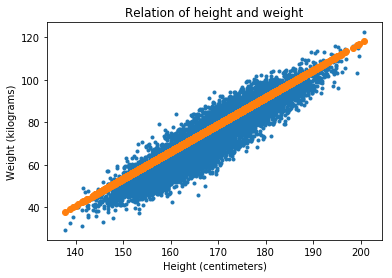

In [5]:
#fit the model
model.fit(trainingInputs,trainingOutputs,verbose=2,epochs=50)  

#visualize the data
pp.figure(1)
pp.scatter(data[:,0],data[:,1],marker=".")
pp.title("Relation of height and weight")
pp.xlabel("Height (centimeters)")
pp.ylabel("Weight (kilograms)")
predictions=model.predict(trainingInputs)
pp.scatter(trainingInputs[:,0],predictions[:,0])

Now, it's easy to query the model with any height values:

In [6]:
print("The predicted weight for a person whose height is 200 cm is",model.predict([[200]])[0,0],"kg")

The predicted weight for a person whose height is 200 cm is 117.322525 kg


Note that above, we had to use [[200]], because we only had one value to predict but the network wants a 2D tensor as input. [[200]] defines an array of shape [1,1] with the only element having indices [0,0] and value 200. Similarly, the prediction is a [1,1] shaped tensor, which we query with indices [0,0].

**Unfortunately, this tensor indexing mess is one of the biggest hurdles in getting into ML coding. Don't worry, it's hard for everyone at first. Once you've wrapped your head around it, things will get much easier.**